## Prepare

In [1]:
! python3 -V

Python 3.9.13


In [ ]:
! pip install -r requirements.txt

In [ ]:
! wget -O dacapo-bench.jar https://downloads.sourceforge.net/project/dacapobench/9.12-bach-MR1/dacapo-9.12-MR1-bach.jar
! wget -O gcviewer-1.36.jar http://sourceforge.net/projects/gcviewer/files/gcviewer-1.36.jar/download
! wget -O jdk.tar.gz https://download.bell-sw.com/java/11.0.20+8/bellsoft-jdk11.0.20+8-linux-amd64.tar.gz
# MACOS
# ! wget -O jdk.tar.gz https://download.bell-sw.com/java/11.0.20.1+1/bellsoft-jdk11.0.20.1+1-macos-amd64.tar.gz
# ! wget -O jdk.zip https://download.bell-sw.com/java/11.0.20.1+1/bellsoft-jdk11.0.20.1+1-windows-amd64.zip
# ! wget https://sourceforge.net/projects/gcviewer/files/gcviewer-1.36.jar/download
! tar xzf jdk.tar.gz && rm -fv jdk.tar.gz
! java -version

In [22]:
! ./jdk-11.0.20/bin/java -jar dacapo/dacapochopin.jar -l

--------------------------------------------------------------------------------
IMPORTANT NOTICE:  This is NOT a release build of the DaCapo suite.
Since it is not an official release of the DaCapo suite, care must be taken when
using the suite, and any use of the build must be sure to note that it is not an
offical release, and should note the relevant git hash.

Feedback is greatly appreciated.   The preferred mode of feedback is via github.
Please use our github page to create an issue or a pull request.
    https://github.com/dacapobench/dacapobench.
--------------------------------------------------------------------------------

avrora batik biojava cassandra eclipse fop graphchi h2 jme jython kafka luindex lusearch pmd spring sunflow tomcat tradebeans tradesoap xalan zxing


In [10]:
!  ./jdk-11.0.20/bin/java -jar dacapo-bench.jar xalan

Using scaled threading model. 48 processors detected, 48 threads used to drive the workload, in a possible range of [1,100]
===== DaCapo 9.12-MR1 xalan starting =====
Normal completion.
===== DaCapo 9.12-MR1 xalan PASSED in 1338 msec =====


In [11]:
! ./jdk-11.0.20/bin/java -XX:+UseParallelGC -Xmx4g -Xms128m  -cp dacapo-bench.jar \
-Xlog:gc=debug:file=gc-avrora.txt -Dvmstat.enable_jfr=yes \
-Dvmstat.csv=yes Harness -v -n 5 xalan

Class name: org.dacapo.harness.Xalan
Configurations:
short     An XSLT processor for transforming XML documents
long      Xalan repeatedly transforms a set of XML documents
author    Apache Software Foundation
license   Apache License, Version 2.0
copyright Copyright (C) 1999-2003 The Apache Software Foundation
url       http://xml.apache.org/xalan-j/
version   2.7.1
sizes     default large small
Using scaled threading model. 48 processors detected, 48 threads used to drive the workload, in a possible range of [1,100]
===== DaCapo 9.12-MR1 xalan starting warmup 1 =====
Normal completion.
===== DaCapo 9.12-MR1 xalan completed warmup 1 in 1163 msec =====
===== DaCapo 9.12-MR1 xalan starting warmup 2 =====
Normal completion.
===== DaCapo 9.12-MR1 xalan completed warmup 2 in 213 msec =====
===== DaCapo 9.12-MR1 xalan starting warmup 3 =====
Normal completion.
===== DaCapo 9.12-MR1 xalan completed warmup 3 in 196 msec =====
===== DaCapo 9.12-MR1 xalan starting warmup 4 =====
Normal completi

In [ ]:
# ! pip install gym
# ! mkdir /home/ellkrauze/tmp
# ! export TMPDIR=/home/ellkrauze/tmp && pip install tensorflow
# ! export TMPDIR=/home/ellkrauze/tmp && pip install protobuf==3.20.*
# ! export TMPDIR=/home/ellkrauze/tmp && pip  install --force-reinstall -U tensorflow==2.3.0 keras keras-rl2 h5py==2.10.*


### GCViewer

In [6]:
# Download jar from http://sourceforge.net/projects/gcviewer/files/gcviewer-1.36.jar/download
! java -cp gcviewer-1.36.jar com.tagtraum.perf.gcviewer.GCViewer gc-avrora.txt summary.csv -t SUMMARY

Sep 11, 2023 1:07:56 PM com.tagtraum.perf.gcviewer.GCViewer doMain
INFO: GCViewer command line mode
Sep 11, 2023 1:07:56 PM com.tagtraum.perf.gcviewer.imp.DataReaderFacade loadModel
INFO: GCViewer version 1.36 (2019-11-30T21:36:26+0000)
Sep 11, 2023 1:07:56 PM com.tagtraum.perf.gcviewer.imp.DataReaderFactory getDataReaderBySample
INFO: File format: Oracle / OpenJDK unified jvm logging
Sep 11, 2023 1:07:56 PM com.tagtraum.perf.gcviewer.imp.DataReaderUnifiedJvmLogging read
INFO: Reading Oracle / OpenJDK unified jvm logging format...
Sep 11, 2023 1:07:56 PM com.tagtraum.perf.gcviewer.imp.DataReaderUnifiedJvmLogging lineContainsParseableEvent
INFO:  Using Parallel
Sep 11, 2023 1:07:56 PM com.tagtraum.perf.gcviewer.imp.DataReaderUnifiedJvmLogging read
INFO: Reading done.
Sep 11, 2023 1:07:56 PM com.tagtraum.perf.gcviewer.GCViewer doMain
INFO: export completed successfully


## Main

In [1]:
! python -V

Python 3.10.0


In [ ]:
! export PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python

import requests
import json
import logging
import warnings
import numpy as np
from typing import List
from gym.spaces import Discrete, Box
import JVMEnv, JVMEnvTest
from tqdm import tqdm 

warnings.filterwarnings(action="ignore")

# GCEasy API Key
API_KEY = "af176fbc-7be2-4fc5-8b31-5624956845c6"

# JDK used for benchmarking
TEST_JDK_PATH = "/home/ellkrauze/projects/gc-ml/jdk-11.0.20"

# DaCapo benchmark name
BM = "batik"

BM_PATH = "dacapo-bench.jar"

# Number of benchmark's iterations in total
NUM_ITER = 5

# Name of the output file (Garbage Collector logs)
GC_LOG_FILE = f"gc-{BM}.txt"

# JVM option to perform action to (increase, leave, decrease)
JVM_OPT_NAME = "MaxHeapSize"
# Maximum heap size array (from 256m to 4G)
JVM_OPT_RANGE = [np.array([268435456]), np.array([4294967296])]

"""
What to optimize: our goal in performance tuning.
This is a JSON field which is extracted from GC log file
using GCEasy API (https://blog.gceasy.io/2016/06/18/garbage-collection-log-analysis-api/).
"""
# GOAL = "throughputPercentage"
GOAL = "fullGCMaxTime"


In [ ]:
# env = JVMEnv.JVMEnv(
#     jdk = TEST_JDK_PATH, 
#     bm_path = BM_PATH,
#     jvm_opt_name = JVM_OPT_NAME,
#     jvm_opt_range = JVM_OPT_RANGE,
#     bm = BM,
#     n = NUM_ITER,
#     goal = GOAL,
#     api_key = API_KEY
# )

## Plot Xmx

In [ ]:

fullgc_values = []
minorgc_values = []
heap_values = []

for Xmx in tqdm(range(268435456, 4294967296, 100 * (2**10) * (2**10))):
    env._run(
        jvm_opts = [f"-XX:MaxHeapSize={Xmx}"], 
        gc_log_file = GC_LOG_FILE, 
        bm = BM, 
        bm_path = BM_PATH, 
        n = NUM_ITER
    )
    
    fullgc_value = env._get_goal_value(
        goal_name = "fullGCMaxTime", 
        gc_log_file = GC_LOG_FILE, 
        api_key = API_KEY
    )

    minorgc_value = env._get_goal_value(
        goal_name = "minorGCMaxTime", 
        gc_log_file = GC_LOG_FILE, 
        api_key = API_KEY
    )

    fullgc_values.append(fullgc_value)
    minorgc_values.append(minorgc_value)
    heap_values.append(Xmx)

100%|██████████| 39/39 [06:48<00:00, 10.47s/it]


100%|██████████| 39/39 [01:50<00:00,  2.83s/it]


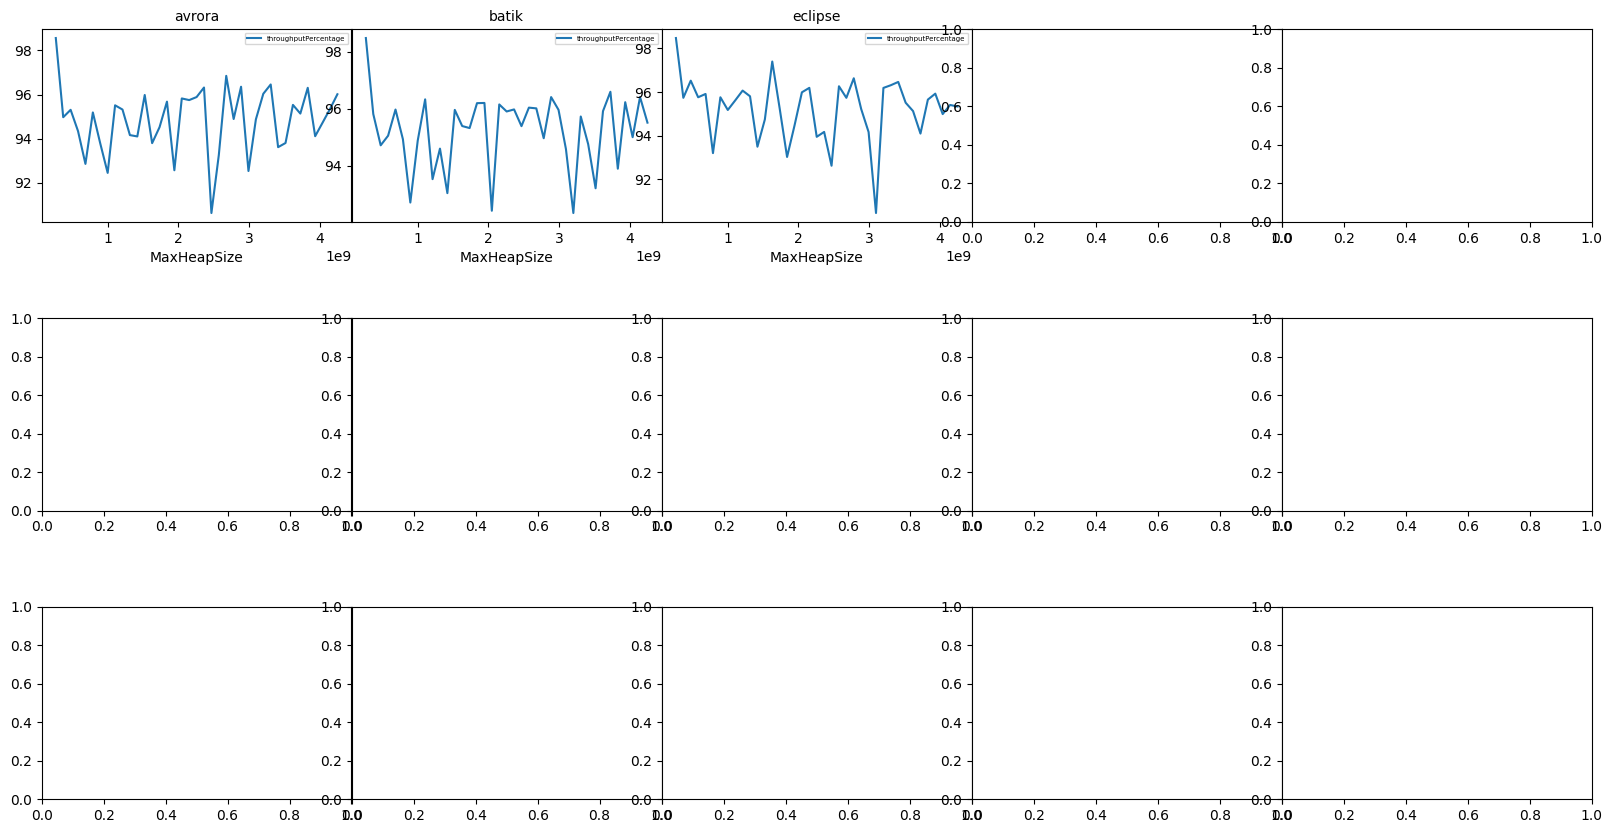

In [ ]:
def get_goal_value(goal_name: str, gc_log_file: str, api_key: str, verbose: bool=False):

    gceasy_url = f"https://api.gceasy.io/analyzeGC?apiKey={api_key}&normalizeUnits=true"
    gc_logfile = {"upload_file": open(gc_log_file, 'rb')}
    headers = {"Content-Type": "text"}

    response = requests.post(gceasy_url, files=gc_logfile, headers=headers)
    gc_info = json.loads(response.text)
    goal_value = gc_info[goal_name]

    if verbose: logging.debug(f"{goal_name} = {goal_value}")

    return float(goal_value)

bms = ["avrora","batik","eclipse", "fop", "h2", "jython", "luindex", "lusearch", "lusearch-fix", "pmd", "sunflow", "tomcat", "tradebeans", "tradesoap", "xalan"]

fig, axs = plt.subplots(3, 5, figsize=(20, 10))
fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()

# for i in range(len(bms)):
for i in range(3):

    # Measurements
    gc_values = []
    heap_values = []

    for Xmx in tqdm(range(268435456, 4294967296, 100 * (2**10) * (2**10))):
        env._run(
            jvm_opts = [f"-XX:MaxHeapSize={Xmx}"], 
            gc_log_file = GC_LOG_FILE, 
            bm = BM, 
            bm_path = BM_PATH, 
            n = 3
        )
        
        gc_value = get_goal_value(
            goal_name = "throughputPercentage", 
            gc_log_file = GC_LOG_FILE, 
            api_key = API_KEY
        )

        gc_values.append(gc_value)
        heap_values.append(Xmx)
    
    # Plots
    axs[i].plot(heap_values, gc_values, label='throughputPercentage')
    axs[i].legend(fontsize = 5)
    axs[i].set_xlabel(JVM_OPT_NAME, fontsize = 10)
    axs[i].set_title(bms[i], fontsize = 10)

# plt.plot(heap_values, fullgc_values, label='minorGCMaxTime')
# plt.plot(heap_values, minorgc_values, label='fullGCMaxTime')
# plt.legend()
# plt.xlabel(JVM_OPT_NAME)
# plt.title(BM)
# plt.show()

# Deep Learning Model

In [ ]:
env = JVMEnvTest.JVMEnvTest()

states = env.observation_space.shape
actions = env.action_space.n

print(states)
print(actions)

model = build_model(states, actions)
model.summary()

In [ ]:
# episodes = 3
# for episode in tqdm(range(1, episodes+1)):
#     state = env.reset()
#     done = False
#     score = 0

#     while not done:
#         env.render(mode="human")
#         action = env.action_space.sample()
#         n_state, reward, done, info = env.step(action)
#         score+=reward
#     #     print(info)
#     #     print(f"Score: {score}")
#     # print('Episode:{} Score:{}'.format(episode, score))

# Tensorflow DQN

In [ ]:
# import dill
# dill.load_session('notebook_env.db')

In [1]:
import os
import imageio
import logging
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

from tf_agents.agents.dqn import dqn_agent
from tf_agents.agents.categorical_dqn import categorical_dqn_agent
from tf_agents.drivers import dynamic_step_driver
from tf_agents.environments import suite_gym
from tf_agents.environments import tf_py_environment
from tf_agents.eval import metric_utils
from tf_agents.metrics import tf_metrics
from tf_agents.networks import categorical_q_network, sequential
from tf_agents.policies import random_tf_policy, policy_saver
from tf_agents.replay_buffers import tf_uniform_replay_buffer
from tf_agents.trajectories import trajectory
from tf_agents.utils import common
from tf_agents.specs import tensor_spec
from tf_agents.drivers.dynamic_step_driver import DynamicStepDriver

# from PyEnvironments import CurveEnv, CurveMultipleEnv, JVMEnv
from PyEnvironments import JVMEnv

2023-09-29 06:09:31.928094: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-29 06:09:31.961304: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-29 06:09:31.962209: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-29 06:09:32.666211: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
# JDK used for benchmarking
# TEST_JDK_PATH = "/Users/ellkrauze/projects/gc-ml/jdk-11.0.20.1.jdk"
TEST_JDK_PATH = "/home/vsakovskaya/gc-ml/jdk-11.0.20"

# DaCapo benchmark name
BM = "kafka"
BM_TEST = "avrora"
BM_PATH = "/home/vsakovskaya/gc-ml/dacapo/dacapochopin.jar"
CALLBACK_PATH = "/home/vsakovskaya/gc-ml/dacapo/DacapoCallback/DacapoChopin/VMStatCallback.java"

# =================
dataset_path = "dataset/data"
tempdir = "tmp"
checkpoint_dir = os.path.join(tempdir, 'checkpoint')
policy_dir = os.path.join(tempdir, 'policy')
# =================

In [4]:
import pickle
with open('saved/env', 'rb') as env_file:
    env = pickle.load(env_file)
    
# env = JVMEnv(
#     jdk=TEST_JDK_PATH, 
#     bm_path=BM_PATH, 
#     callback_path=CALLBACK_PATH,
#     bm=BM, 
#     verbose=True
# )

train_env = tf_py_environment.TFPyEnvironment(env)
eval_env = tf_py_environment.TFPyEnvironment(env)

test_env = tf_py_environment.TFPyEnvironment(
    JVMEnv(
        jdk=TEST_JDK_PATH, 
        bm_path=BM_PATH, 
        callback_path=CALLBACK_PATH,
        bm=BM_TEST,
        verbose=True
    )
)

openjdk version "11.0.20" 2023-07-18 LTS
OpenJDK Runtime Environment (build 11.0.20+8-LTS)
OpenJDK 64-Bit Server VM (build 11.0.20+8-LTS, mixed mode)
openjdk version "11.0.20" 2023-07-18 LTS
OpenJDK Runtime Environment (build 11.0.20+8-LTS)
OpenJDK 64-Bit Server VM (build 11.0.20+8-LTS, mixed mode)


Successfully initialized a JVM Environment!
 JDK: /home/vsakovskaya/gc-ml/jdk-11.0.20/bin,
 Benchmark: kafka (/home/vsakovskaya/gc-ml/dacapo/dacapochopin.jar),
 Number of iterations: 5,
 Goal: avgGCPause,
 Number of JVM options: 2,
 JVM options: {'MaxTenuringThreshold': {'min': 1, 'max': 16}, 'ParallelGCThreads': {'min': 20, 'max': 48}},
 Env. default state: [list([15, 33]) 0.00892],
 Env. default goal value: 0.00892,



openjdk version "11.0.20" 2023-07-18 LTS
OpenJDK Runtime Environment (build 11.0.20+8-LTS)
OpenJDK 64-Bit Server VM (build 11.0.20+8-LTS, mixed mode)
openjdk version "11.0.20" 2023-07-18 LTS
OpenJDK Runtime Environment (build 11.0.20+8-LTS)
OpenJDK 64-Bit Server VM (build 11.0.20+8-LTS, mixed mode)


Successfully initialized a JVM Environment!
 JDK: /home/vsakovskaya/gc-ml/jdk-11.0.20/bin,
 Benchmark: avrora (/home/vsakovskaya/gc-ml/dacapo/dacapochopin.jar),
 Number of iterations: 5,
 Goal: avgGCPause,
 Number of JVM options: 2,
 JVM options: {'MaxTenuringThreshold': {'min': 1, 'max': 16}, 'ParallelGCThreads': {'min': 20, 'max': 48}},
 Env. default state: [list([15, 33]) 0.00898],
 Env. default goal value: 0.00898,



In [5]:
fc_layer_params = (100, 50)
action_tensor_spec = tensor_spec.from_spec(env.action_spec())
num_actions = action_tensor_spec.maximum - action_tensor_spec.minimum + 1

def dense_layer(num_units):
    """
    Define a helper function to create Dense layers configured 
    with the right activation and kernel initializer.
    """
    return tf.keras.layers.Dense(
        num_units,
        activation=tf.keras.activations.relu,
        kernel_initializer=tf.keras.initializers.VarianceScaling(
            scale=2.0, mode='fan_in', distribution='truncated_normal'))

# QNetwork consists of a sequence of Dense layers followed by a dense layer
# with `num_actions` units to generate one q_value per available action as
# its output.
dense_layers = [dense_layer(num_units) for num_units in fc_layer_params]
q_values_layer = tf.keras.layers.Dense(
    num_actions,
    activation=None,
    kernel_initializer=tf.keras.initializers.RandomUniform(
        minval=-0.03, maxval=0.03),
    bias_initializer=tf.keras.initializers.Constant(-0.2))
q_net = sequential.Sequential(dense_layers + [q_values_layer])

In [45]:
num_iterations = 15000 # @param {type:"integer"}

initial_collect_steps = 1000  # @param {type:"integer"} 
collect_steps_per_iteration = 1  # @param {type:"integer"}
replay_buffer_capacity = 100000  # @param {type:"integer"}

fc_layer_params = (100,)

# batch_size = 64  # @param {type:"integer"}
batch_size = 128  # @param {type:"integer"}
# learning_rate = 1e-3  # @param {type:"number"}
learning_rate = 3e-1
gamma = 0.99
gradient_clipping = 1
log_interval = 200  # @param {type:"integer"}

num_atoms = 51  # @param {type:"integer"}
min_q_value = -20  # @param {type:"integer"}
max_q_value = 20  # @param {type:"integer"}
n_step_update = 10  # @param {type:"integer"}

target_update_period = 100000

num_eval_episodes = 10  # @param {type:"integer"}
eval_interval = 100  # @param {type:"integer"}

optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=learning_rate)
train_step_counter = tf.Variable(0)
global_step = tf.compat.v1.train.get_or_create_global_step()

agent = dqn_agent.DqnAgent(
    train_env.time_step_spec(),
    train_env.action_spec(),
    q_network=q_net,
    optimizer=optimizer,
    n_step_update=n_step_update,
    # td_errors_loss_fn=common.element_wise_squared_loss,
    td_errors_loss_fn=tf.keras.losses.MeanSquaredError(),
    epsilon_greedy=0.9, # a probability of choosing a random action
    target_update_period=target_update_period, # ??
    gamma=gamma,
    gradient_clipping=gradient_clipping, # [-1, 1]
    train_step_counter=global_step)
    
agent.initialize()

## Metrics and Evaluation

The most common metric used to evaluate a policy is the average return. The return is the sum of rewards obtained while running a policy in an environment for an episode, and we usually average this over a few episodes. We can compute the average return metric as follows.


In [7]:
#@test {"skip": true}
def compute_avg_return(environment, policy, num_episodes=10):

  total_return = 0.0
  for _ in tqdm(range(num_episodes)):
    time_step = environment.reset()
    episode_return = 0.0

    action_step = policy.action(time_step, seed=42)
    time_step = environment.step(action_step.action)
    # print(time_step)
    episode_return += time_step.reward
    
    # while not time_step.is_last():
    #   try:
    #     action_step = policy.action(time_step, seed=42)
    #     time_step = environment.step(action_step.action)
    #     print(time_step)
    #     episode_return += time_step.reward
    #     # print(f"{_}: {time_step.observation}, {time_step.reward}")
    #   except Exception:
    #     pass
      # print(time_step)
    total_return += episode_return

  avg_return = total_return / num_episodes
  return avg_return.numpy()[0]


In [8]:
random_policy = random_tf_policy.RandomTFPolicy(
  time_step_spec = train_env.time_step_spec(),
  action_spec = train_env.action_spec(),
  automatic_state_reset=True
)

# compute_avg_return(eval_env, random_policy, num_eval_episodes)
# compute_avg_return(eval_env, agent.policy, num_eval_episodes)

## Data Collection

In order to keep track of the data collected from the environment, we will use a replay buffer. It stores experience data when we collect trajectories and is consumed during training.

This replay buffer is constructed using specs describing the tensors that are to be stored, which can be obtained from the agent using `agent.collect_data_spec`.

Set up the replay buffer and the initial data collection with the random policy.

In [9]:
train_metrics = [
    tf_metrics.NumberOfEpisodes(),
    tf_metrics.EnvironmentSteps(),
    tf_metrics.AverageReturnMetric(),
    tf_metrics.AverageEpisodeLengthMetric(),
]

In [10]:
replay_buffer = tf_uniform_replay_buffer.TFUniformReplayBuffer(
    data_spec=agent.collect_data_spec,
    batch_size=train_env.batch_size,
    max_length=replay_buffer_capacity)

train_checkpointer = common.Checkpointer(
    ckpt_dir=checkpoint_dir,
    max_to_keep=1,
    agent=agent,
    policy=agent.policy,
    replay_buffer=replay_buffer,
    global_step=global_step
)

# store state, target and reward history
trajectories = []

tf_policy_saver = policy_saver.PolicySaver(agent.policy)

In [11]:
replay_buffer_observer = replay_buffer.add_batch

collect_driver = DynamicStepDriver(
    train_env,
    agent.collect_policy,
    observers=[replay_buffer_observer] + train_metrics,
    num_steps=collect_steps_per_iteration) # collect N steps for each training iteration

In [12]:
def collect_step(environment, policy):
    time_step = environment.current_time_step()
    action_step = policy.action(time_step)
    try:
        next_time_step = environment.step(action_step.action)
        reward = next_time_step.reward
        traj = trajectory.from_transition(time_step, action_step, next_time_step)

        replay_buffer.add_batch(traj)
        trajectories.append([traj.observation, env._reward])
    except ValueError:
        pass

    return reward

def save_dataset(data, path):
    step_counter = tf.Variable(0, trainable=False)
    checkpoint_prefix = "checkpoint"
    checkpoint_args = {
        "checkpoint_interval": 50,
        "step_counter": step_counter,
        "directory": checkpoint_prefix,
        "max_to_keep": 3,
    }
    try:
        data.save(path, checkpoint_args=checkpoint_args)
    except:
        pass

def save_rb(replay_buffer, path):
    tf.train.Checkpoint(rb = replay_buffer).save(path)

def restore_rb(replay_buffer, path):
    tf.train.Checkpoint(rb = replay_buffer).restore(path)


In [34]:
# ! Change it if you want to load saved dataset
# collect_dataset = False
collect_dataset = False

if collect_dataset:
    for _ in tqdm(range(initial_collect_steps)):
        collect_step(train_env, random_policy)
    save_rb(replay_buffer, dataset_path)
else: 
    restore_rb(replay_buffer, dataset_path+'-1')

dataset = replay_buffer.as_dataset(
    num_parallel_calls=3, 
    sample_batch_size=batch_size,
    num_steps=n_step_update + 1, 
    single_deterministic_pass=False).prefetch(3)

# dataset = dataset.shuffle(buffer_size=5000)

iterator = iter(dataset)


/home/vsakovskaya/my-env/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


### Visualize Dataset

In [14]:
x = []
y = []
pairs = []
rews = []
for each in trajectories:
    pairs.append(each[0].numpy()[0])
    x.append(each[0][0][0].numpy())
    y.append(each[0][0][1].numpy())
    rews.append(each[1])
    # print(each[1])

In [15]:
rewards_df = pd.DataFrame(pairs, rews, columns=["MaxTenuringThreshold", "ParallelGCThreads"])
rewards_df = rewards_df.reset_index()
rewards_df = rewards_df.rename(columns={'index': 'reward'})
rewards_df.sort_values(by='reward', ascending=False)

,reward,MaxTenuringThreshold,ParallelGCThreads
151,0.477146,13,32
258,0.477146,10,32
257,0.477146,13,32
411,0.477146,7,32
412,0.477146,10,32
...,...,...,...
204,-1.046823,16,48
72,-1.046823,13,48
217,-1.046823,13,48
67,-1.046823,13,48


<Axes: xlabel='MaxTenuringThreshold,ParallelGCThreads'>

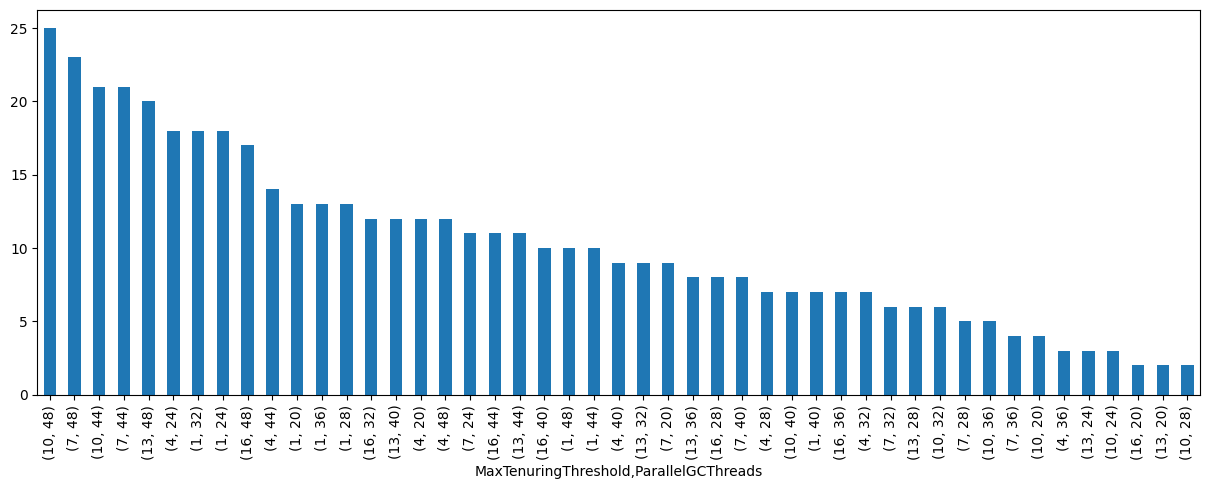

In [16]:
import pandas as pd

df = pd.DataFrame(pairs, columns=["MaxTenuringThreshold", "ParallelGCThreads"])

df = df[df["MaxTenuringThreshold"].isin(range(1, 16+1, 3)) & df["ParallelGCThreads"].isin(range(20, 48+1, 4))]

df.value_counts().head(100).plot(figsize=(15,5), kind='bar')

<Axes: xlabel='ParallelGCThreads', ylabel='MaxTenuringThreshold'>

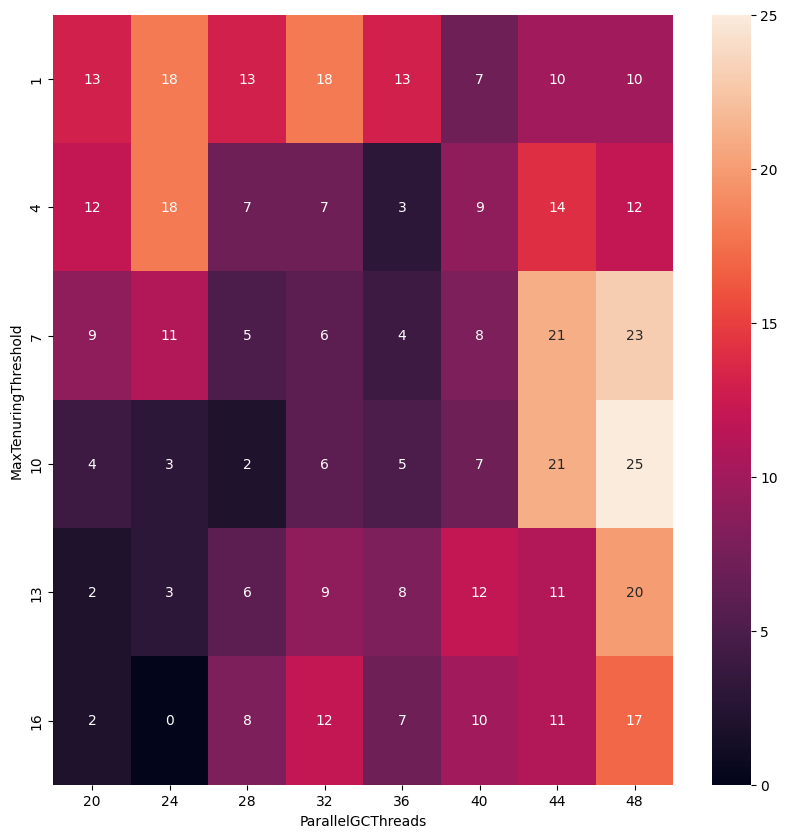

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(10, 10))

x = df.pivot_table(index='MaxTenuringThreshold',columns='ParallelGCThreads',aggfunc='size',fill_value=0)
idx = x.max(axis=1).sort_values(ascending=0).index
sns.heatmap(x, annot=True, ax=ax, fmt="")

Plot data as heatmap.

In [18]:
env._default_state

array([list([15, 33]), 0.00897], dtype=object)

/tmp/ipykernel_40480/2669318646.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  data_pivoted = data.pivot("X", "Y", "Z")


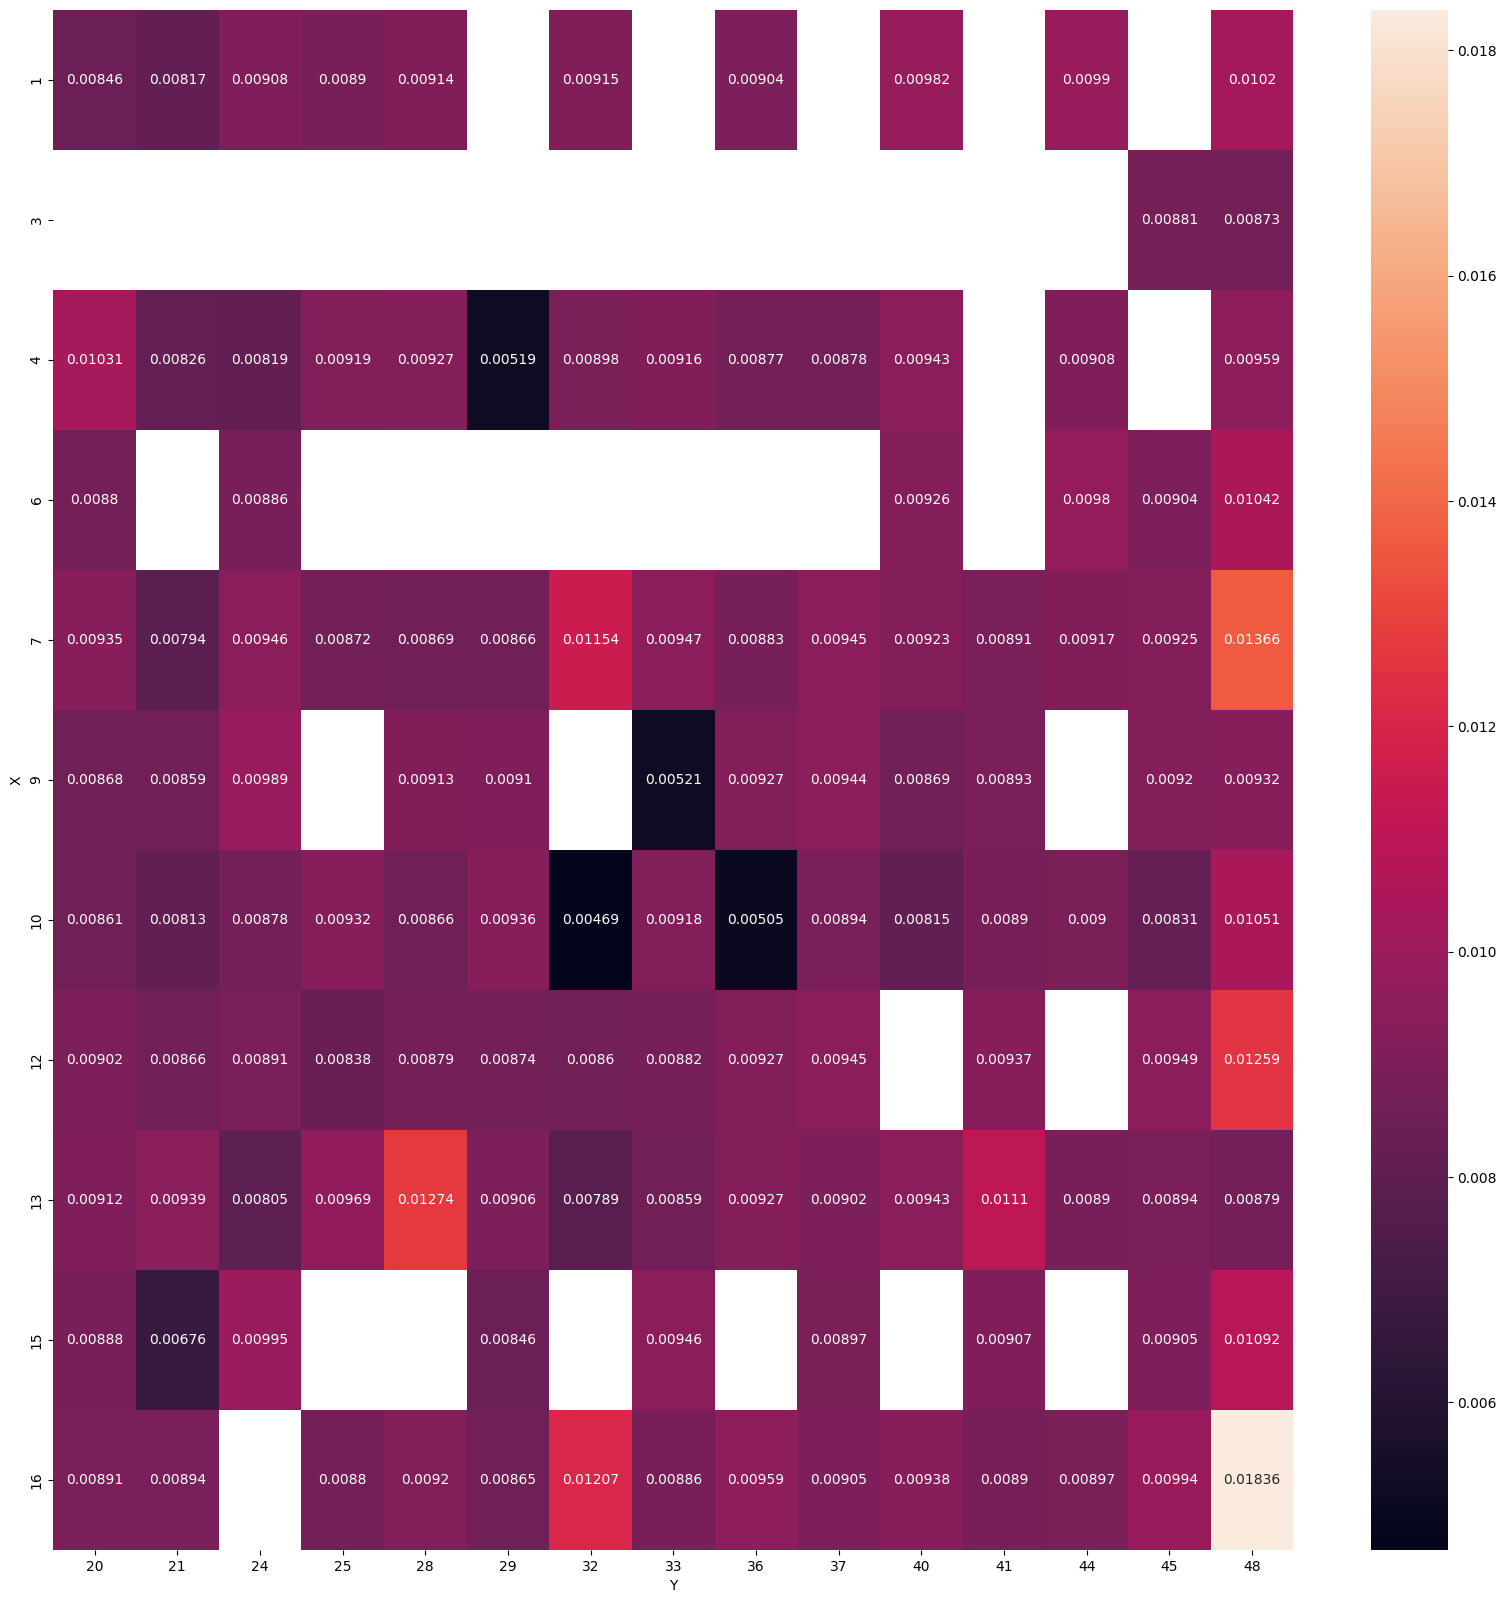

In [19]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(20, 20)) # figsize=(10, 10)
# X = [1,1,1,1,1,1,1,1,1,1]
# Y = [1,2,3,4,5,6,7,8,9,10]
# Z = [0.2, 0.33, 0.1, 0.25, 0.0, 0.9, 0.75, 0.88, 0.44, 0.95]
cached_states = env._perf_states
X = [cached_states[i]["args"][0] for i in cached_states.keys()]
Y = [cached_states[i]["args"][1] for i in cached_states.keys()]
Z = [cached_states[i]["goal"] for i in cached_states.keys()]

data = pd.DataFrame({'X': X, 'Y': Y, 'Z': Z})
data_pivoted = data.pivot("X", "Y", "Z")
ax = sns.heatmap(data_pivoted, annot=True, ax=ax, fmt="")
plt.show()

## Agent Training

The training loop involves both collecting data from the environment and optimizing the agent's networks. Along the way, we will occasionally evaluate the agent's policy to see how we are doing.

We also need an `optimizer` to train the network we just created, and a `train_step_counter` variable to keep track of how many times the network was updated.

Note that one other significant difference from vanilla `DqnAgent` is that we now need to specify `min_q_value` and `max_q_value` as arguments. These specify the most extreme values of the support (in other words, the most extreme of the 51 atoms on either side). Make sure to choose these appropriately for your particular environment. Here we use -20 and 20.

In [46]:
from tf_agents.eval.metric_utils import log_metrics
logging.getLogger().setLevel(logging.INFO)

tf.config.run_functions_eagerly(True)

# (Optional) Optimize by wrapping some of the code in a graph using TF function.
agent.train = common.function(agent.train)
collect_driver.run = common.function(collect_driver.run)

# Reset the train step
agent.train_step_counter.assign(0)
agent.initialize()

# Evaluate the agent's policy once before training.
# avg_return = compute_avg_return(eval_env, agent.policy, num_eval_episodes)
# returns = [avg_return]

loss = []
returns = []
time_step = None
policy_state = agent.collect_policy.get_initial_state(train_env.batch_size)
eval_interval = 100 

for _ in tqdm(range(5000)):
  # Sample a batch of data from the buffer and update the agent's network.

  time_step, policy_state = collect_driver.run(time_step, policy_state)
  experience, buffer_info = next(iterator)
  train_loss = agent.train(experience)
  step = agent.train_step_counter.numpy()

  if step % 100 == 0:
    print(f"step = {step}: loss = {train_loss.loss}")
    loss.append(train_loss.loss)
    # rewards.append(reward)
    # log_metrics(train_metrics)

  # if step % 100 == 0:
  #   avg_return = compute_avg_return(eval_env, agent.policy, num_eval_episodes)
  #   print('step = {0}: Average Return = {1:.5f}'.format(step, avg_return))
  #   returns.append(avg_return)

  2%|▏         | 103/5000 [00:04<03:33, 22.92it/s]

step = 100: loss = 0.05290350690484047


  4%|▍         | 202/5000 [00:09<03:42, 21.59it/s]

step = 200: loss = 0.03959439694881439


  6%|▌         | 304/5000 [00:13<03:29, 22.44it/s]

step = 300: loss = 0.0334700271487236


  8%|▊         | 403/5000 [00:17<03:10, 24.14it/s]

step = 400: loss = 0.04820100590586662


 10%|█         | 502/5000 [00:22<03:33, 21.06it/s]

step = 500: loss = 0.03855466842651367


 12%|█▏        | 604/5000 [00:26<03:03, 23.97it/s]

step = 600: loss = 0.047606632113456726


 14%|█▍        | 703/5000 [00:31<03:16, 21.88it/s]

step = 700: loss = 0.04790405556559563


 16%|█▌        | 802/5000 [00:35<03:15, 21.49it/s]

step = 800: loss = 0.05267307907342911


 18%|█▊        | 901/5000 [00:40<03:09, 21.68it/s]

step = 900: loss = 0.06792658567428589


 20%|██        | 1003/5000 [00:44<02:47, 23.84it/s]

step = 1000: loss = 0.0549088716506958


 22%|██▏       | 1102/5000 [00:48<02:39, 24.45it/s]

step = 1100: loss = 0.17568233609199524


 24%|██▍       | 1204/5000 [00:53<02:46, 22.83it/s]

step = 1200: loss = 0.08453517407178879


 26%|██▌       | 1303/5000 [00:57<02:57, 20.79it/s]

step = 1300: loss = 0.028080441057682037


 28%|██▊       | 1402/5000 [01:02<02:31, 23.69it/s]

step = 1400: loss = 0.057687822729349136


 30%|███       | 1504/5000 [01:06<02:23, 24.31it/s]

step = 1500: loss = 0.040606867522001266


 32%|███▏      | 1603/5000 [01:11<02:35, 21.81it/s]

step = 1600: loss = 0.05340671166777611


 34%|███▍      | 1702/5000 [01:15<02:20, 23.51it/s]

step = 1700: loss = 0.06291497498750687


 36%|███▌      | 1804/5000 [01:20<02:28, 21.49it/s]

step = 1800: loss = 0.04189569503068924


 38%|███▊      | 1903/5000 [01:24<02:08, 24.17it/s]

step = 1900: loss = 0.21704314649105072


 40%|████      | 2002/5000 [01:28<02:16, 21.89it/s]

step = 2000: loss = 0.029198620468378067


 42%|████▏     | 2104/5000 [01:33<02:19, 20.81it/s]

step = 2100: loss = 0.04390975832939148


 44%|████▍     | 2203/5000 [01:37<02:10, 21.41it/s]

step = 2200: loss = 0.058395739644765854


 46%|████▌     | 2302/5000 [01:41<01:59, 22.58it/s]

step = 2300: loss = 0.014008445665240288


 48%|████▊     | 2404/5000 [01:46<01:54, 22.66it/s]

step = 2400: loss = 0.05219589173793793


 50%|█████     | 2503/5000 [01:50<01:42, 24.28it/s]

step = 2500: loss = 0.0740334615111351


 52%|█████▏    | 2602/5000 [01:55<01:48, 22.01it/s]

step = 2600: loss = 0.022793728858232498


 54%|█████▍    | 2704/5000 [01:59<01:35, 24.11it/s]

step = 2700: loss = 0.021796874701976776


 56%|█████▌    | 2803/5000 [02:04<01:35, 23.08it/s]

step = 2800: loss = 0.19468142092227936


 58%|█████▊    | 2902/5000 [02:08<01:29, 23.52it/s]

step = 2900: loss = 0.17279039323329926


 60%|██████    | 3004/5000 [02:12<01:25, 23.43it/s]

step = 3000: loss = 0.06130558252334595


 62%|██████▏   | 3103/5000 [02:17<01:23, 22.85it/s]

step = 3100: loss = 0.07668815553188324


 64%|██████▍   | 3202/5000 [02:21<01:21, 21.98it/s]

step = 3200: loss = 0.054936543107032776


 66%|██████▌   | 3304/5000 [02:26<01:17, 21.88it/s]

step = 3300: loss = 0.06510047614574432


 68%|██████▊   | 3403/5000 [02:30<01:08, 23.44it/s]

step = 3400: loss = 0.040090955793857574


 70%|███████   | 3502/5000 [02:35<01:00, 24.74it/s]

step = 3500: loss = 0.03977775573730469


 72%|███████▏  | 3601/5000 [02:39<01:02, 22.47it/s]

step = 3600: loss = 0.07489174604415894


 74%|███████▍  | 3703/5000 [02:44<00:56, 22.99it/s]

step = 3700: loss = 0.06539329886436462


 76%|███████▌  | 3802/5000 [02:48<00:55, 21.71it/s]

step = 3800: loss = 0.13346262276172638


 78%|███████▊  | 3904/5000 [02:52<00:44, 24.77it/s]

step = 3900: loss = 0.03384747356176376


 80%|████████  | 4003/5000 [02:57<00:40, 24.35it/s]

step = 4000: loss = 0.08453316986560822


 82%|████████▏ | 4102/5000 [03:01<00:40, 22.30it/s]

step = 4100: loss = 0.21034789085388184


 84%|████████▍ | 4204/5000 [03:06<00:33, 23.77it/s]

step = 4200: loss = 0.036152858287096024


 86%|████████▌ | 4303/5000 [03:10<00:28, 24.09it/s]

step = 4300: loss = 0.034185029566287994


 88%|████████▊ | 4405/5000 [03:14<00:25, 23.36it/s]

step = 4400: loss = 0.04363298416137695


 90%|█████████ | 4504/5000 [03:19<00:22, 22.28it/s]

step = 4500: loss = 0.04566780477762222


 92%|█████████▏| 4603/5000 [03:23<00:17, 22.62it/s]

step = 4600: loss = 0.13385486602783203


 94%|█████████▍| 4705/5000 [03:27<00:12, 22.93it/s]

step = 4700: loss = 0.03412659466266632


 96%|█████████▌| 4804/5000 [03:32<00:07, 24.57it/s]

step = 4800: loss = 0.049721479415893555


 98%|█████████▊| 4903/5000 [03:36<00:04, 22.26it/s]

step = 4900: loss = 0.048389680683612823


100%|██████████| 5000/5000 [03:40<00:00, 22.64it/s]

step = 5000: loss = 0.06431333720684052


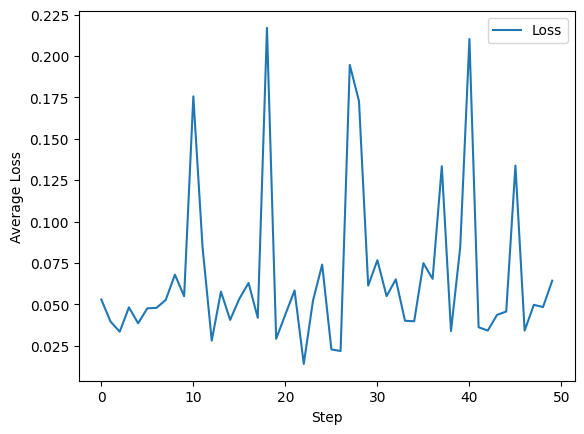

In [47]:
plt.plot(loss, label="Loss")
# plt.plot(train_loss.extra.td_loss.numpy(), label="Loss.t")
# plt.plot(train_loss.extra.td_error.numpy())
# plt.plot(returns, label="Rewards")
plt.ylabel('Average Loss')
plt.xlabel('Step')
plt.legend()
plt.show()

In [27]:
import pickle

with open('saved/env', 'wb') as env_file:
  pickle.dump(env, env_file)


In [36]:
# ## Add some noise
# print(env._perf_states)

# for each in env._perf_states.values():
#     noise = np.random.uniform(low = 0.001, high = 0.003)
#     noise = round(noise, 5)
#     each["goal"] = each["goal"] + noise

# print(env._perf_states)

Save to checkpoint.

In [34]:
train_checkpointer.save(global_step)

INFO:absl:Saved checkpoint: tmp/checkpoint/ckpt-15000


## Visualization: training


### Plots

We can plot return vs global steps to see the performance of our agent. In `Cartpole-v1`, the environment gives a reward of +1 for every time step the pole stays up, and since the maximum number of steps is 500, the maximum possible return is also 500.

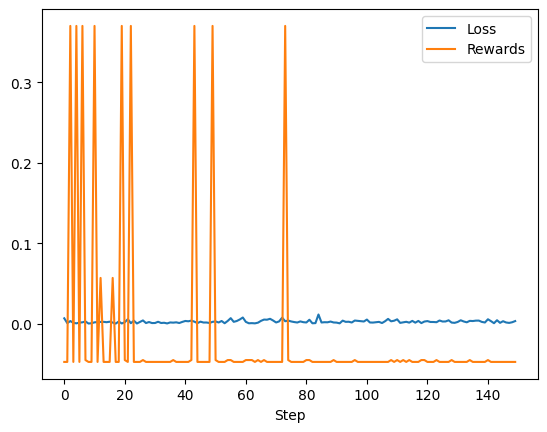

In [36]:
#@test {"skip": true}

# steps = range(0, num_iterations, log_interval)
# plt.plot(steps, returns)
# plt.plot(steps, loss)
# plt.plot(loss)
plt.plot(loss, label="Loss")
plt.plot(returns, label="Rewards")
# plt.ylabel('Average Loss')
plt.xlabel('Step')
# plt.ylim([0, 0.001])
plt.legend()
# plt.ylim(top=550)
plt.show()

### Metrics

In [ ]:
from tf_agents.eval.metric_utils import compute
from tf_agents.metrics.tf_metrics import AverageReturnMetric


compute(metrics=[AverageReturnMetric], 
        environment=train_env, 
        policy=agent.policy, 
        num_episodes=10)

In [62]:


train_metrics[0].result()

<tf.Tensor: shape=(), dtype=int64, numpy=0>

### Restore checkpoint

In [43]:
def run_episodes(policy, eval_tf_env, eval_py_env, num_episodes: int=10):
    # frames = []
    total_return = 0.0
    for _ in tqdm(range(num_episodes)):
        episode_return = 0.0
        time_step = eval_tf_env.reset()
        # frames.append(eval_py_env.render())
        threshold = 0
        while not time_step.is_last():
            # if threshold >= 10:
            #     break
            action_step = policy.action(time_step)
            time_step = eval_tf_env.step(action_step.action)
            # frames.append(eval_py_env.render())
            # print(time_step.reward)
            episode_return += time_step.reward
            threshold += 1
        total_return += episode_return

    avg_return = total_return / num_episodes

    print(total_return)
    print(avg_return)
    return avg_return.numpy()[0]


# def test(policy, env, num_episodes: int=10):
#     loss = []
#     rewards = []
#     reward = None
#     time_step = eval_tf_env.reset()

#     for _ in tqdm(range(num_episodes)):
#         action_step = policy.action(time_step)
#         time_step = env.step(action_step.action)
#         episode_return += time_step.reward

# The whole set of objects should be recreated 
# the same way as when the checkpoint was created.
train_checkpointer.initialize_or_restore()
global_step = tf.compat.v1.train.get_global_step()

# Also save policy and export to a location
tf_policy_saver.save(policy_dir)

# The policy can be loaded without having any knowledge 
# of what agent or network was used to create it. 
# This makes deployment of the policy much easier.
# Load the saved policy and check how it performs.
saved_policy = tf.saved_model.load(policy_dir)
reward = run_episodes(saved_policy, eval_env, env_e, num_episodes=10)
print(reward)

# saved_res = compute_avg_return(eval_env, saved_policy, num_episodes=20)
# random_res = compute_avg_return(eval_env, random_policy, num_episodes=20)

INFO:tensorflow:Assets written to: tmp/policy/assets


/home/vsakovskaya/my-env/lib/python3.9/site-packages/tensorflow/python/saved_model/nested_structure_coder.py:475: UserWarning: Encoding a StructuredValue with type tfp.distributions.Deterministic_ACTTypeSpec; loading this StructuredValue will require that this type be imported and registered.
  warnings.warn("Encoding a StructuredValue with type %s; loading this "
INFO:tensorflow:Assets written to: tmp/policy/assets
  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [01:50<?, ?it/s]


KeyboardInterrupt: 

## Test agent

<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject at 0x22788bdaeb0>

In [15]:
# eval_env.reset()

state = np.array([[6423576576, 402653184], 0.00578], dtype=object)
saved_policy[state]
# q_values = saved_policy.

TypeError: '_UserObject' object is not subscriptable

In [11]:
time_step = eval_env.current_time_step['observation']

TypeError: 'method' object is not subscriptable

## Keras-rl2 DQNAgent

In [ ]:
import tensorflow as tf
print(tf.__version__)
from keras import __version__
tf.keras.__version__ = __version__

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
# from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.legacy import Adam

import matplotlib.pyplot as plt
from rl.agents import DQNAgent
from rl.policy import BoltzmannQPolicy, EpsGreedyQPolicy
from rl.memory import SequentialMemory
from rl.callbacks import ModelIntervalCheckpoint, FileLogger


def build_model(states, actions):
    model = Sequential()
    model.add(Flatten(input_shape=(1, 2)))
    model.add(Dense(24, activation='relu', input_shape=states))
    model.add(Dense(24, activation='relu'))
    model.add(Dense(actions, activation='linear'))
    # model.add(Flatten())
    return model
    
def build_callbacks(env_name):
    checkpoint_weights_filename = 'dqn_' + env_name + '_weights_{step}.h5f'
    log_filename = 'dqn_{}_log.json'.format(env_name)
    callbacks = [ModelIntervalCheckpoint(checkpoint_weights_filename, interval=5000)]
    callbacks += [FileLogger(log_filename, interval=100)]
    return callbacks

def build_agent(model, actions):
    policy = BoltzmannQPolicy()
    memory = SequentialMemory(limit=50000, window_length=1)
    dqn = DQNAgent(model=model, memory=memory, policy=policy,
                  nb_actions=actions, nb_steps_warmup=10, target_model_update=1e-2)
    return dqn

LEARNING_RATE = 0.1
GAMMA = 0.9999

callbacks = build_callbacks("gc")

# policy = BoltzmannQPolicy()
policy = EpsGreedyQPolicy()
# memory = SequentialMemory(limit=50000, window_length=1)

# memory can help a model during training
# for this, we only consider a single malware sample (window_length=1) for each "experience"
memory = SequentialMemory(limit=50000, window_length=1)

# DQN agent as described in Mnih (2013) and Mnih (2015).
# http://arxiv.org/pdf/1312.5602.pdf
# http://arxiv.org/abs/1509.06461
dqn = DQNAgent(
    model=model, 
    memory=memory, 
    policy=policy,
    nb_actions=actions, 
    nb_steps_warmup=10, 
    target_model_update=1e-2, 
    batch_size=16,
    gamma=GAMMA
)

# keras-rl allows one to use and built-in keras optimizer
dqn.compile(Adam(lr=LEARNING_RATE), metrics=['mae'])

history = dqn.fit(env, nb_max_episode_steps=100, nb_steps=50000, visualize=False, verbose=1)

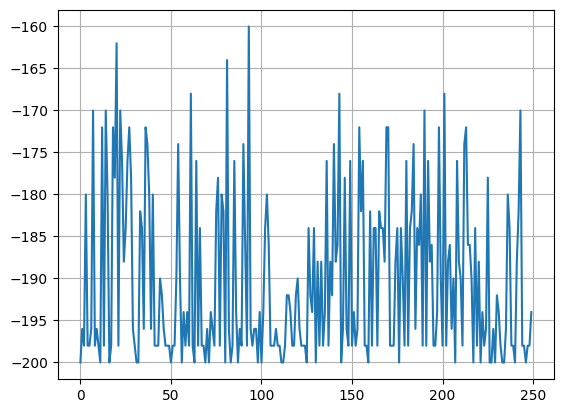

In [ ]:
import matplotlib.pyplot as plt 
plt.grid(True)
plt.plot(history.history['episode_reward'])

In [ ]:
# scores = dqn.test(env, nb_episodes=100, visualize=False)

# scores = dqn.test(
#     env, 
#     nb_episodes=1,
#     visualize=False, 
#     verbose=1
# )

scores = dqn.test(
    env,
    nb_episodes=100,
    action_repetition=1,
    nb_max_episode_steps=200,
    visualize=False,
    verbose=1
)

# print(np.mean(scores.history['episode_reward']))

Testing for 100 episodes ...
Episode 1: reward: -200.000, steps: 200
Episode 2: reward: -198.000, steps: 200
Episode 3: reward: -200.000, steps: 200
Episode 4: reward: -200.000, steps: 200
Episode 5: reward: -196.000, steps: 200
Episode 6: reward: -198.000, steps: 200
Episode 7: reward: -198.000, steps: 200
Episode 8: reward: -200.000, steps: 200
Episode 9: reward: -198.000, steps: 200
Episode 10: reward: -198.000, steps: 200
Episode 11: reward: -196.000, steps: 200
Episode 12: reward: -198.000, steps: 200
Episode 13: reward: -198.000, steps: 200
Episode 14: reward: -198.000, steps: 200
Episode 15: reward: -198.000, steps: 200
Episode 16: reward: -200.000, steps: 200
Episode 17: reward: -200.000, steps: 200
Episode 18: reward: -200.000, steps: 200
Episode 19: reward: -198.000, steps: 200
Episode 20: reward: -200.000, steps: 200
Episode 21: reward: -200.000, steps: 200
Episode 22: reward: -198.000, steps: 200
Episode 23: reward: -198.000, steps: 200
Episode 24: reward: -200.000, steps: 

KeyboardInterrupt: 

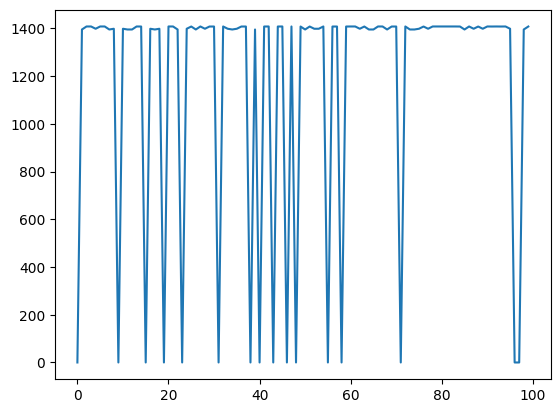

In [ ]:
import matplotlib.pyplot as plt 
plt.plot(scores.history['episode_reward'])

In [ ]:
_ = dqn.test(env, nb_episodes=15, visualize=False)

DONE
{'agent': array([  2., -19.]), 'target': array([  1.99999998, -19.        ])}


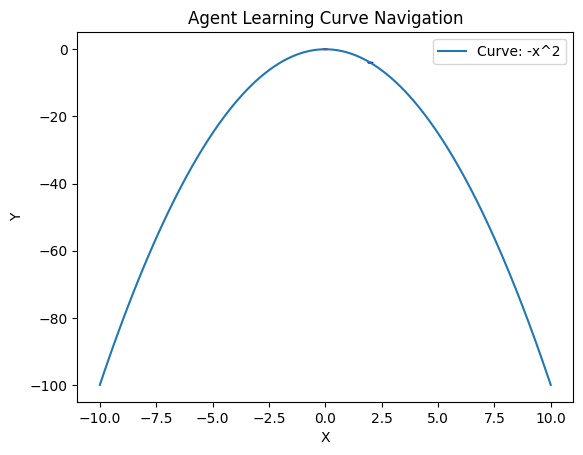

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

{'agent': array([ 3., -8.]), 'target': array([  2., -19.])}


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
# from gym.envs.classic_control import rendering
import math

def visualize_learning_realtime(agent, env):
    plt.ion()  # Turn on interactive mode
    fig, ax = plt.subplots()

    x_vals = np.linspace(-10, 10, 400)
    y_vals = [2*math.pow(x, 3) - 3*math.pow(x, 2) - 12 * x + 1 for x in x_vals]
    target_x = 0

    agent_x = env._agent_location[0]

    line, = ax.plot(x_vals, y_vals, label="Curve: -x^2")
    target_circle = plt.Circle((target_x, 0), 0.1, color='red')
    agent_circle = plt.Circle((agent_x, -agent_x ** 2), 0.1, color='blue')

    ax.add_patch(target_circle)
    ax.add_patch(agent_circle)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Agent Learning Curve Navigation')
    ax.legend()

    plt.draw()

    for _ in range(200):
        action = agent.forward(env.observation_space.sample())  # Replace with your agent's action selection
        observation, reward, done, _ = env.step(action)

        agent_x = observation[0]

        agent_circle.center = (agent_x, -agent_x ** 2)
        plt.pause(0.01)
        plt.draw()

        if done:
            env.reset()

    plt.ioff()
    plt.show()

visualize_learning_realtime(dqn, env)

## Save and load

In [ ]:
dqn.save_weights('dqn_weights.h5f', overwrite=True)

In [ ]:
# env = gym.make('CartPole-v0')
actions = env.action_space.n
states = env.observation_space.shape[0]
model = build_model(states, actions)
dqn = build_agent(model, actions)
dqn.compile(Adam(lr=1e-3), metrics=['mae'])

In [ ]:
dqn.load_weights('dqn_weights.h5f')

In [ ]:
_ = dqn.test(env, nb_episodes=5, visualize=True)

## Parameters

* ParallelGCThreads: int
* MaxGCPauseMillis: int
* GCTimeRatio: int
* MaxHeapSize: int
* InitialHeapSize: int
* YoungGenerationSizeIncrement: int
* TenuredGenerationSizeIncrement: int
* AdaptiveSizeDecrementScaleFactor: int
* ParallelGCBufferWastePct: int
* ParallelOldDeadWoodLimiterMean: int
* ParallelOldDeadWoodLimiterStdDev: int
* PreTouchParallelChunkSize: int

* UseGCOverheadLimit: bool
* ParallelRefProcBalancingEnabled: bool
* ParallelRefProcEnabled: bool
* AllowParallelDefineClass: bool
* CMSParallelInitialMarkEnabled: bool
* CMSParallelRemarkEnabled: bool
* CMSParallelSurvivorRemarkEnabled: bool
* GCParallelVerificationEnabled: bool